In [0]:
!pip install langdetect

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=df8f05db10383b90742b3133f63c7456d66d2e11021aff9d679e87fd7fe8c82c
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


* ### Importing Required python libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer




* ### Data Pre-Processing

In [0]:

test = pd.read_csv('test_1.csv')
train = pd.read_csv('train.csv')




In [0]:
test.head()


,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [0]:
train.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [0]:
# Shape of each set

print("Shape of TRAIN DATA: ", train.shape)
print("Shape of TEST DATA: ", test.shape)


Shape of TRAIN DATA:  (10240, 2)
Shape of TEST DATA:  (2551, 2)


In [0]:
train.describe(), test.describe()

(                                                Statement  Label
 count                                               10240  10240
 unique                                              10223      2
 top     On changing the rules for filibusters on presi...   True
 freq                                                    3   5752,
                                                 Statement Label
 count                                                2551  2551
 unique                                               2551     2
 top     Polls show that Americans overwhelmingly suppo...  True
 freq                                                    1  1382)

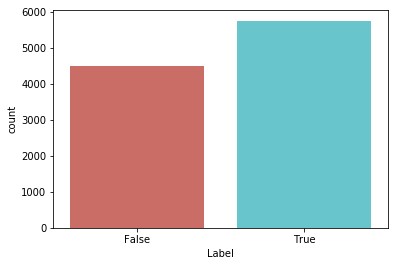

In [14]:
# Distribution of classes for prediction
def Class_Distr(datafile):
  return sb.countplot(x='Label' , data= datafile, palette='hls')

# Even Distribution of data between Train,Test and Valid dataset

Class_Distr(train)
Class_Distr(test)





* ### Data Cleaning and Quality checking

In [15]:
def Data_Clean():
  print("Processing...")
# Train
  train.isnull().sum()
  train.info()


# Test
  test.isnull().sum()
  test.info()
  

Data_Clean()
print("Cleaning over..")

Processing...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
Statement    10240 non-null object
Label        10240 non-null bool
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
Statement    2551 non-null object
Label        2551 non-null bool
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
Cleaning over..


In [0]:
# Saving the original Data for future

train_orig = train.copy()
test_orig = test.copy()



In [0]:
# Stemming 

def stemming(str_tokens, str_stemmer):
  stemmed_str = []
  for token_i in str_token:
    stemmed.append(str_stemmer.stem(token_i))

  return stemmed



In [0]:
# Data process

def data_process(data, exclude_stopword = True, stem = True):
  str_tokens = [w.lower() for w in data]
  stemmed_tokens = str_tokens
  stemmed_tokens = stemming(str_tokens, eng_stemmer)
  stemmed_tokens = [w for w in stemmed_tokens if w not in stopwords ]
  
  return tokens_stemmed
  

In [0]:
 
#creating ngrams
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words

#bigram
def create_bigrams(words):
    assert type(words) == list
    gap = 0
    joinned_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,gap+2):
                if i+k < Len:
                    lst.append(joinned_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [0]:
# Trigram creation

def create_trigrams(words):
    assert type(words) == list
    gap == 0
    joinned_str = " "
    Len = len(words)
    if L > 2:
        lst = []
        for i in range(1,gap+2):
            for k1 in range(1, gap+2):
                for k2 in range(1,gap+2):
                    if i+k1 < Len and i+k1+k2 < Len:
                        lst.append(joinned_str.join([words[i], words[i+k1],words[i+k1+k2]]))
        else:
            #set is as bigram
            lst = create_bigram(words)
    return lst

In [0]:
porter_str = PorterStemmer()

In [0]:
def porter_tokenizer(statement):
    return [porter.stem(word) for word in statement.split()]


* ## Feature Scalling

In [23]:
! pip install gensim


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec
from sklearn.pipeline import Pipeline
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [25]:
# creating word matrix  with bag of word technique
countV = CountVectorizer()
train_count = countV.fit_transform(train['Statement'].values)

print(countV)
print(train_count)

def countVectorizer_matrix():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1


In [0]:
# create tf-df features 
tfidfV = TfidfTransformer()

train_tfidf = tfidfV.fit_transform(train_count)




In [0]:


def tfidf_matrix():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


#bag of words - with n-grams
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf = True,smooth_idf = True)



In [28]:
# Tags
nltk.download('averaged_perceptron_tagger')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train['Statement']
 
print(training_sentences)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
5        The Chicago Bears have had more starting quart...
6        Jim Dunnam has not lived in the district he re...
7        I'm the only person on this stage who has work...
8        However, it took $19.5 million in Oregon Lotte...
9        Says GOP primary opponents Glenn Grothman and ...
10       For the first time in history, the share of th...
11       Since 2000, nearly 12 million Americans have s...
12       When Mitt Romney was governor of Massachusetts...
13       The economy bled $24 billion due to 

### Training Features


In [0]:

def features_Scale(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }
    

In [0]:
# Fuction to strips the tags

def untagging(tagged_sentences):
  return [w for w,t in tagged_sentences]

# Applying Word2vec

with open("glove.6B.50d.txt", "rb") as lines:
  w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
           for line in lines}

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


## Classifications
* Bianary Classification

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import learning_curve,  GridSearchCV
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



In [0]:
#string to test
#doc_new = ['Says Rush Limbaugh made it clear hed rather see the country fail than President Barack Obama succeed.']

statement_doc = ['obama is running for president in 2016']



* Using Bag Words Technique

using previous features that we scalled we classify the dataset with:
* Random Forest Classification Algorithm
* LSTM Classification Algorithm

In [35]:
#Random Forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=2))
        ])
print("Accuracy: ")    
random_forest.fit(train['Statement'],train['Label'])
predicted_rf = random_forest.predict(test['Statement'])
np.mean(predicted_rf == test['Label'])




Accuracy: 


0.6272050176401411

In [36]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Confusion Matrix ==> \n\n", confusion_matrix(test['Label'], predicted_rf))
print("\n\n Accuracy Score: ", accuracy_score(test['Label'], predicted_rf)*100)

print("\n____________________________________________________________________\n")
print("Classification Report of Random Forest: \n\n", classification_report(test['Label'], predicted_rf))


Confusion Matrix ==> 

 [[ 487  682]
 [ 269 1113]]


 Accuracy Score:  62.72050176401412

____________________________________________________________________

Classification Report of Random Forest: 

               precision    recall  f1-score   support

       False       0.64      0.42      0.51      1169
        True       0.62      0.81      0.70      1382

    accuracy                           0.63      2551
   macro avg       0.63      0.61      0.60      2551
weighted avg       0.63      0.63      0.61      2551



* ### LSTM Model of Classification

In [43]:
# LSTM Model
import pandas as pd
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras import optimizers
from keras.models import Sequential



max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(train)
sequences = tok.texts_to_sequences(train['Statement'])
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# Recurrent Neural Network

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)

# kernel_regularizer=keras.regularizers.l2(0.001)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
   # sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    #keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model = Model(inputs=inputs,outputs=layer)
    return model


Using TensorFlow backend.


In [0]:
# embedding_vecor_length = 32
# top_words = 5000
# max_review_length = 150
# model = Sequential()
# model.add(Embedding(top_words+2, embedding_vecor_length, input_length=max_review_length))
# model.add(LSTM(100))
# model.add(Dense(1, activation='sigmoid'))
# keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# model.summary()
# model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [45]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [46]:

# Training of model
model.fit(sequences_matrix,train['Label'],batch_size=512,epochs=10,
          validation_split=0.2,
          # callbacks=[(monitor='val_loss',min_delta=0.01)]
          )

Train on 8192 samples, validate on 2048 samples
Epoch 1/10
8192/8192 [==============================] - 10s 1ms/step - loss: 0.6870 - acc: 0.5547 - val_loss: 0.6887 - val_acc: 0.5479
Epoch 2/10
8192/8192 [==============================] - 5s 634us/step - loss: 0.6851 - acc: 0.5652 - val_loss: 0.6887 - val_acc: 0.5479
Epoch 3/10
8192/8192 [==============================] - 5s 633us/step - loss: 0.6852 - acc: 0.5652 - val_loss: 0.6912 - val_acc: 0.5479
Epoch 4/10
8192/8192 [==============================] - 5s 641us/step - loss: 0.6855 - acc: 0.5652 - val_loss: 0.6896 - val_acc: 0.5479
Epoch 5/10
8192/8192 [==============================] - 5s 643us/step - loss: 0.6849 - acc: 0.5652 - val_loss: 0.6903 - val_acc: 0.5479
Epoch 6/10
8192/8192 [==============================] - 5s 637us/step - loss: 0.6848 - acc: 0.5652 - val_loss: 0.6888 - val_acc: 0.5479
Epoch 7/10
8192/8192 [==============================] - 5s 641us/step - loss: 0.6848 - acc: 0.5652 - val_loss: 0.6914 - val_acc: 0.5479
E

In [0]:
test_sequences = tok.texts_to_sequences(test['Statement'])
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [48]:

accr = model.evaluate(test_sequences_matrix,test['Label'])

2551/2551 [==============================] - 9s 3ms/step


In [49]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.691
  Accuracy: 0.542


* ## Random Forest Model Prediction and Text Verification

In [0]:
import pickle
Saved_model = 'Model(task-1).sav'
pickle.dump(random_forest,open(Saved_model,'wb'))

In [41]:
import pickle
# some testing news
# We are already almost halfway to our 2010 goal of creating 700,000 new jobs in seven years.
# # Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
# I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.
var = input("Enter the news text you want to test or verify: ")
print("Your Entry: " + str(var))


# Here we go with the prediction:
def detecting_fake_news(var):    
    load_model = pickle.load(open('Model(task-1).sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("Folowing Statement predicted as:  ",prediction[0]),
        print("The truth probability score will be:  ",prob[0][1]))
  
if __name__ == '__main__':
    detecting_fake_news(var)


Enter the news text you want to test or verify:  Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
Your Entry:  Medicaid spending declined by 1.9 percent in 2012, the second such decline in 47 years.
Folowing Statement predicted as:   True
The truth probability score will be:   0.8866666666666667
